In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
dataset = pd.read_csv('./datasets_11956_16450_international-airline-passengers.csv')
dataset = dataset.drop(dataset.index[[144]])
data = dataset.iloc[:, 1:2].values
# print(data)
print(data.shape) # (144, 1)

(144, 1)


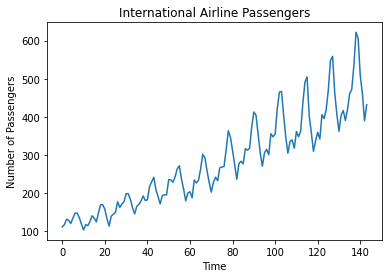

In [75]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.show()

In [76]:
data.astype("float32")

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)
data_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [194]:
time_steps=10
train_data_size = int(len(data_scaled)*0.70)
# train_data_size = 100
test_data_size = len(data_scaled) - train_data_size
print("Train data size is {}".format(train_data_size))
print("Test data size is {}".format(test_data_size))

Train data size is 100
Test data size is 44


In [195]:
train = data_scaled[0:train_data_size,:]
test = data_scaled[train_data_size:len(data_scaled),:]
print("Train data size is {}".format(len(train)))
print("Test data size is {}".format(len(test)))

Train data size is 100
Test data size is 44


In [196]:
x_train = []
y_train = []

# for i in range(time_steps, len(train)):
#   a = train[i- time_steps: i, 0]
#   x_train.append(a)
#   y_train.append(train[i, 0])
for i in range(len(train)-time_steps-1):
    a = train[i:(i+time_steps),0]
    x_train.append(a)
    y_train.append(train[i + time_steps,0])
trainX = np.array(x_train)
trainY = np.array(y_train)
trainX.shape

(89, 10)

In [197]:
x_test = []
y_test = []

# for i in range(len(train)-time_steps-1, len(train)):
#     a = train[i: i+time_steps, 0]
#     x_test.append(a)
#     y_test.append(train[i + time_steps, 0])

'''
# temp = len(train) - 1 - time_steps
# print(test.shape)
# print(train.shape)
# test = np.concatenate((train[temp:, 0], test))

# for i in range(len(train)-time_steps-1):
#     a = train[i-time_steps: i, 0]
#     x_test.append(a)
#     y_test.append(test[i + time_steps,0])
# temp = len(x_train) - 1 - time_steps
# test = np.concatenate(x_train[temp:, 0], test)
# for i in range(time_steps, len(test)):
#     a = test[i-time_steps: i, 0]
#     x_test.append(a)
#     y_test.append(test[i, 0])

'''

for i in range(len(test)-time_steps-1):
    a = test[i:(i+time_steps),0]
    x_test.append(a)
    y_test.append(test[i + time_steps,0])
    
testX = np.array(x_test)
# testX = np.reshape(testX, (len(testX), 1))
testY = np.array(y_test)
testX.shape

(33, 10)

In [200]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
# Print and check shapes
print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))
# print(testX)

Shape of trainX is (89, 10, 1)
Shape of testX is (33, 10, 1)


In [201]:
from keras.layers import Dense, SimpleRNN, Dropout
from keras.metrics import mean_squared_error
from keras.models import Sequential

In [202]:
model = Sequential()
# Add the first layer and Dropout regularization
model.add(SimpleRNN(units=100,activation='tanh',return_sequences=True, 
                    input_shape=(trainX.shape[1],1)))
model.add(Dropout(0.20))
# Second layer and Dropout regularization
model.add(SimpleRNN(units = 100, activation='tanh',return_sequences=True))
model.add(Dropout(0.20))
# Third layer and Dropout regularization
model.add(SimpleRNN(units = 70, activation='tanh', return_sequences= True))
model.add(Dropout(0.20))
# Fourth layer and Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.20))
# Add final or output layer
model.add(Dense(units=1))

# Compile our RNN model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the training set
model.fit(trainX, trainY, epochs = 200, batch_size=32)

Epoch 1/200
3/3 [==============================] - 0s 14ms/step - loss: 0.6214
Epoch 2/200
3/3 [==============================] - 0s 9ms/step - loss: 0.4257
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 0.2849
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2331
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 0.3060
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2179
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1847
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2207
Epoch 9/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1928
Epoch 10/200
3/3 [==============================] - 0s 9ms/step - loss: 0.1830
Epoch 11/200
3/3 [==============================] - 0s 9ms/step - loss: 0.1391
Epoch 12/200
3/3 [==============================] - 0s 8ms/step - loss: 0.1567
Epoch 13/200
3/3 [==============================] - 0s 10ms/

In [203]:
trainPrediction = model.predict(trainX)
# testX = testX.astype(np.int)
testPrediction = model.predict(testX)

# we scaled datas between 0 and 1 but now we're at the end of the project.
# So we should inverse transform datas.

trainPrediction = scaler.inverse_transform(trainPrediction)
trainY = scaler.inverse_transform([trainY])
testPrediction = scaler.inverse_transform(testPrediction)
testY = scaler.inverse_transform([testY])

In [204]:
# import tensorflow as tf
# import math
# sess = tf.compat.v1.Session()
# with sess.as_default():
#     trainScore = math.sqrt(mean_squared_error(np.array(trainY[0]), np.array(trainPrediction[:,0])).eval())
#     testScore = math.sqrt(mean_squared_error(np.array(testY[0]), np.array(testPrediction[:,0])).eval())
# print("Train Score is %.2lf RMSE"%(trainScore))
# print("Test Score is %.2lf RMSE"%(testScore))

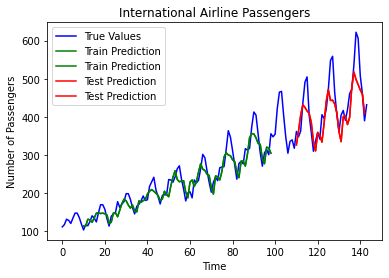

In [205]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPrediction)+time_steps, :] = trainPrediction

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPrediction)+(time_steps*2)+1:len(dataset)-1, :] = testPrediction

plt.plot(scaler.inverse_transform(data_scaled),label = 'True Values', color='blue')
plt.plot(trainPredictPlot,label='Train Prediction', color='green')
plt.plot(testPredictPlot,label = 'Test Prediction', color='red')
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.legend()
plt.show()